# **BANK MARKETING**

**Nama :** Difa Fisabilillah

**Kode Peserta :** PYTN-KS18-017

In [90]:
import pandas  as pd # import pandas
import numpy as np # import numpy
import matplotlib.pyplot as plt # import matplotlib
import seaborn as sns # import seaborn

from sklearn.model_selection import train_test_split # import train_test_split
from sklearn.naive_bayes import GaussianNB #  import GaussianNB
from sklearn import metrics # import metrics
from sklearn.ensemble import RandomForestClassifier  # import RandomForestClassifier
from sklearn.linear_model import LogisticRegression # import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV # import LogisticRegressionCV
from sklearn.neighbors import KNeighborsClassifier # import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler # import StandardScaler
from sklearn import svm # import svm
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree


In [91]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [92]:
cd './drive/MyDrive/Hacktiv8/Bank Marketing/'

[Errno 2] No such file or directory: './drive/MyDrive/Hacktiv8/Bank Marketing/'
/content/drive/MyDrive/Hacktiv8/Bank Marketing


# **Loading and Review Data**

In [93]:
# Load data
bank_data = pd.read_csv('./bank-additional-full.csv', delimiter=';')

In [94]:
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

Pada tahap ini function .info() digunakan untuk melihat apakah ada data null pada tiap feature dan untuk mengecek tipe data apa yang dimiliki feature tersebut.

In [95]:
# cek shape data
bank_data.shape

(41188, 21)

Dataset ini memiliki 41188 baris dan 21 feature kolom

In [96]:
bank_data.head() # preview data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [97]:
# cek nan/null value
bank_data.isnull().values.any()

False

Output yang dihasilkan adalah False, yang berarti Nan / null value tidak ada

In [98]:
# memeriksa korelasi data
def plot_corr(bank_data, size=11):
  corr = bank_data.corr()
  fig, ax= plt.subplots(figsize=(size,size))
  ax.matshow(corr)
  plt.xticks(range(len(corr.columns)), corr.columns)
  plt.yticks(range(len(corr.columns)), corr.columns)

<ipython-input-98-f5874df24c17>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = bank_data.corr()


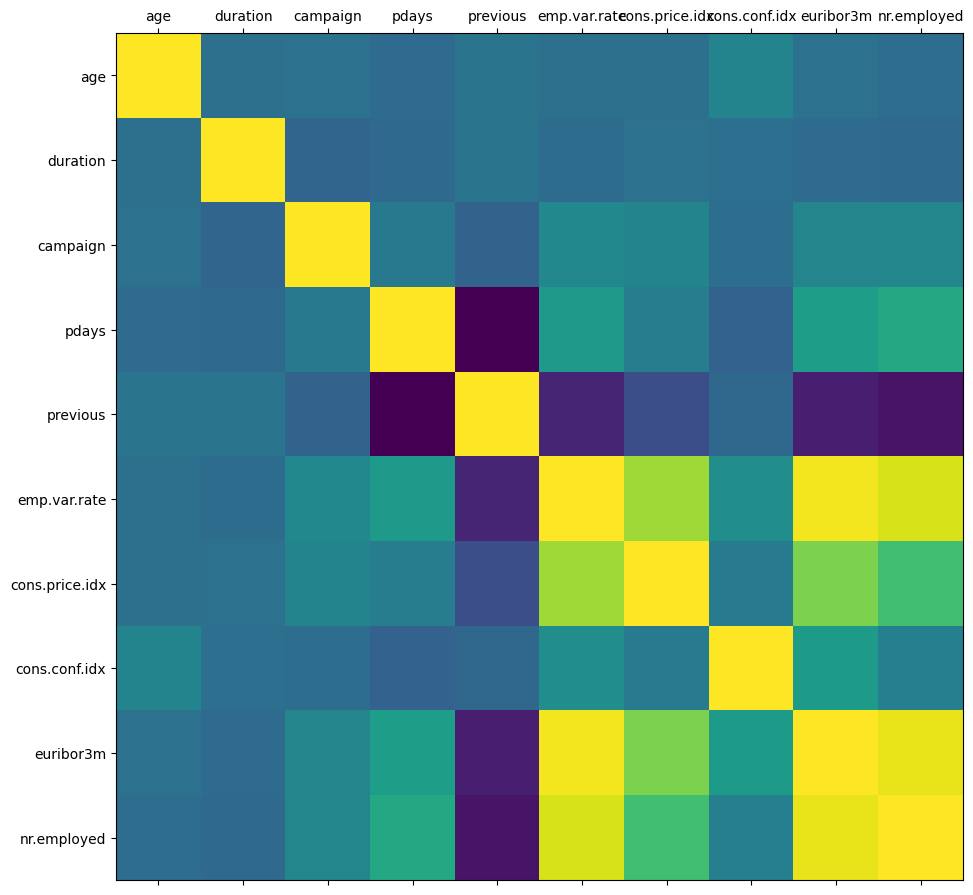

In [99]:
plot_corr(bank_data)

Pada visualisasi diatas, warna kuning menggabarkan bahwa ada korelasi antara 2 kolom. Tetapi tedapat keanehan korelasi antara kolom eurivor3m dan emp.var.rate, karena sama-sama digambarkan dengan warna kuning. Maka dari itu perlu dilakukan cek apakah kolom ini memang memiliki korelasi/ data yang sama atau tidak

In [100]:
# Cek nilai korelasi
bank_data.corr()

<ipython-input-100-d30231444418>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  bank_data.corr()


,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
age,1.000000,-0.000866,0.004594,-0.034369,0.024365,-0.000371,0.000857,0.129372,0.010767,-0.017725
duration,-0.000866,1.000000,-0.071699,-0.047577,0.020640,-0.027968,0.005312,-0.008173,-0.032897,-0.044703
campaign,0.004594,-0.071699,1.000000,0.052584,-0.079141,0.150754,0.127836,-0.013733,0.135133,0.144095
pdays,-0.034369,-0.047577,0.052584,1.000000,-0.587514,0.271004,0.078889,-0.091342,0.296899,0.372605
previous,0.024365,0.020640,-0.079141,-0.587514,1.000000,-0.420489,-0.203130,-0.050936,-0.454494,-0.501333
emp.var.rate,-0.000371,-0.027968,0.150754,0.271004,-0.420489,1.000000,0.775334,0.196041,0.972245,0.906970
cons.price.idx,0.000857,0.005312,0.127836,0.078889,-0.203130,0.775334,1.000000,0.058986,0.688230,0.522034
cons.conf.idx,0.129372,-0.008173,-0.013733,-0.091342,-0.050936,0.196041,0.058986,1.000000,0.277686,0.100513
euribor3m,0.010767,-0.032897,0.135133,0.296899,-0.454494,0.972245,0.688230,0.277686,1.000000,0.945154
nr.employed,-0.017725,-0.044703,0.144095,0.372605,-0.501333,0.906970,0.522034,0.100513,0.945154,1.000000


Setelah cek korelasi, ternyata tidak ada data yang berkorelasi, sehingga data tetap sama tidak dilakukan pengurangan data

In [101]:
# Mengubah nilai yes, no pada kolom biner menjadi biner
deposit_map ={'yes': 1, 'no':  0}
bank_data['y']=bank_data['y'].map(deposit_map)

In [102]:
bank_data.head() # preview data saat ini

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0


In [103]:
bank_data['y'].unique() # Cek apakah ada data lain selain yes dan no

array([0, 1])

In [104]:
n = len(bank_data) # nayaknya data
num_of_yes = len(bank_data.loc[bank_data['y']== 1]) # banyak data yes
num_of_no = len(bank_data.loc[bank_data['y']== 0]) # banyak data no
print(" jumlah client yang berlanggan deposit : {0} ({1:2.2f}%)".format(num_of_yes, (num_of_yes/n)*100)) # jumlah data client berlangganan deposit
print(" jumlah client yang tidak berlanggan deposit : {0} ({1:2.2f}%)".format(num_of_no, (num_of_no/n)*100)) # jumlah data client yang tidak berlangganan deposit

 jumlah client yang berlanggan deposit : 4640 (11.27%)
 jumlah client yang tidak berlanggan deposit : 36548 (88.73%)


In [105]:
# data kolom y
pie_ratio=bank_data.y.value_counts()
pie_ratio

0    36548
1     4640
Name: y, dtype: int64

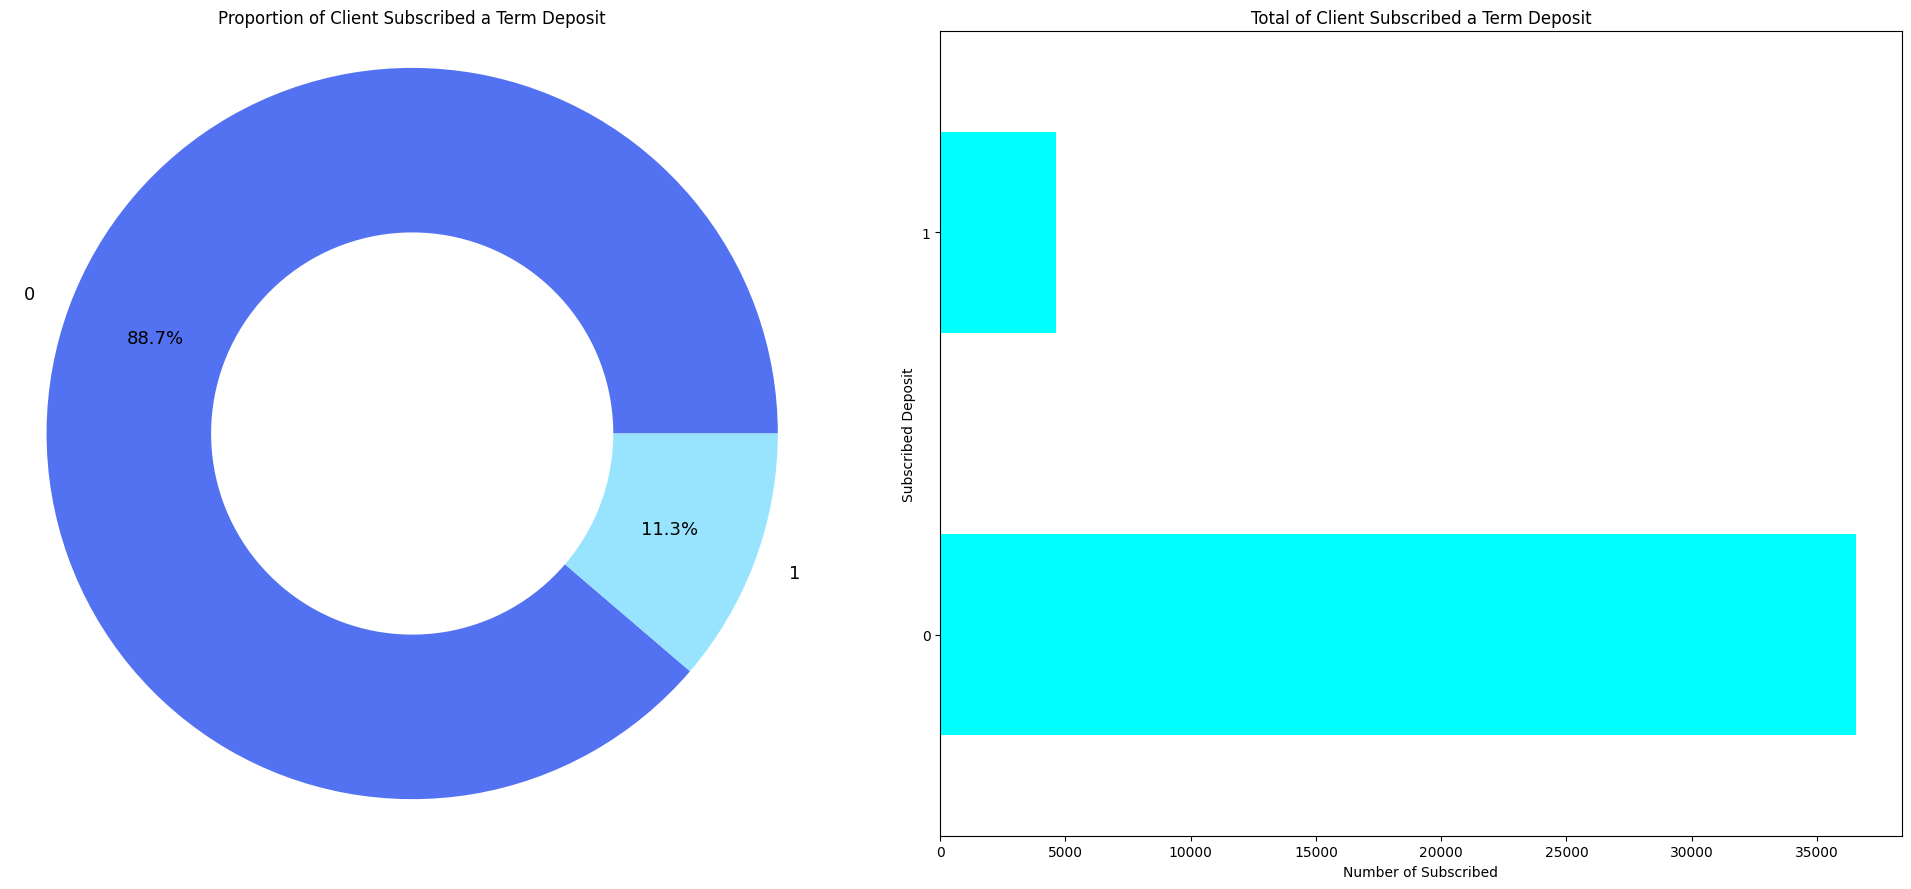

In [106]:
# Visualisasi
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 9))

# Pie chart
ax1.pie(pie_ratio, labels=pie_ratio.index, autopct='%1.1f%%', pctdistance=0.75, colors=['#5272F2', '#98E4FF'],
        wedgeprops={'width': 0.45}, textprops={'fontsize': 13})
ax1.axis('square')
ax1.set_title('Proportion of Client Subscribed a Term Deposit')

# Bar chart
bank_data['y'].value_counts().plot(kind='barh', cmap='cool', ax=ax2)
ax2.set_title('Total of Client Subscribed a Term Deposit')
ax2.set_ylabel('Subscribed Deposit')
ax2.set_xlabel('Number of Subscribed')

# Menampilkan plot
plt.tight_layout()  # Untuk menghindari tumpang tindih elemen
plt.show()

Pada visualisasi ini, dapat dilihat bahwa jumlah client yang berlangganan deposit lebih kecil dari yang tidak berlangganan

In [107]:
bank_data['education'].unique()

array(['basic.4y', 'high.school', 'basic.6y', 'basic.9y',
       'professional.course', 'unknown', 'university.degree',
       'illiterate'], dtype=object)

pada kategori data education terdapat data unknown / tidak diketahui. maka dari itu, data unknown ini akan diubah menjadi nan value

In [108]:
# Load data kolom bertipe object / string
object_column = list(bank_data.select_dtypes(include=['object']))
object_column

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'poutcome']

In [109]:
bank_data[bank_data[object_column]=='unknown'].count().sort_values(ascending=False)

default           8597
education         1731
housing            990
loan               990
job                330
marital             80
age                  0
poutcome             0
nr.employed          0
euribor3m            0
cons.conf.idx        0
cons.price.idx       0
emp.var.rate         0
duration             0
previous             0
pdays                0
campaign             0
day_of_week          0
month                0
contact              0
y                    0
dtype: int64

Dapat dilihat bahwa kolom default, education, housing, loan, job dan material memiliki data yang 'unknown'

In [110]:
# mengubah 'unknown' data menjadi Nan Value
bank_data[bank_data[object_column]=='unknown'] = np.nan

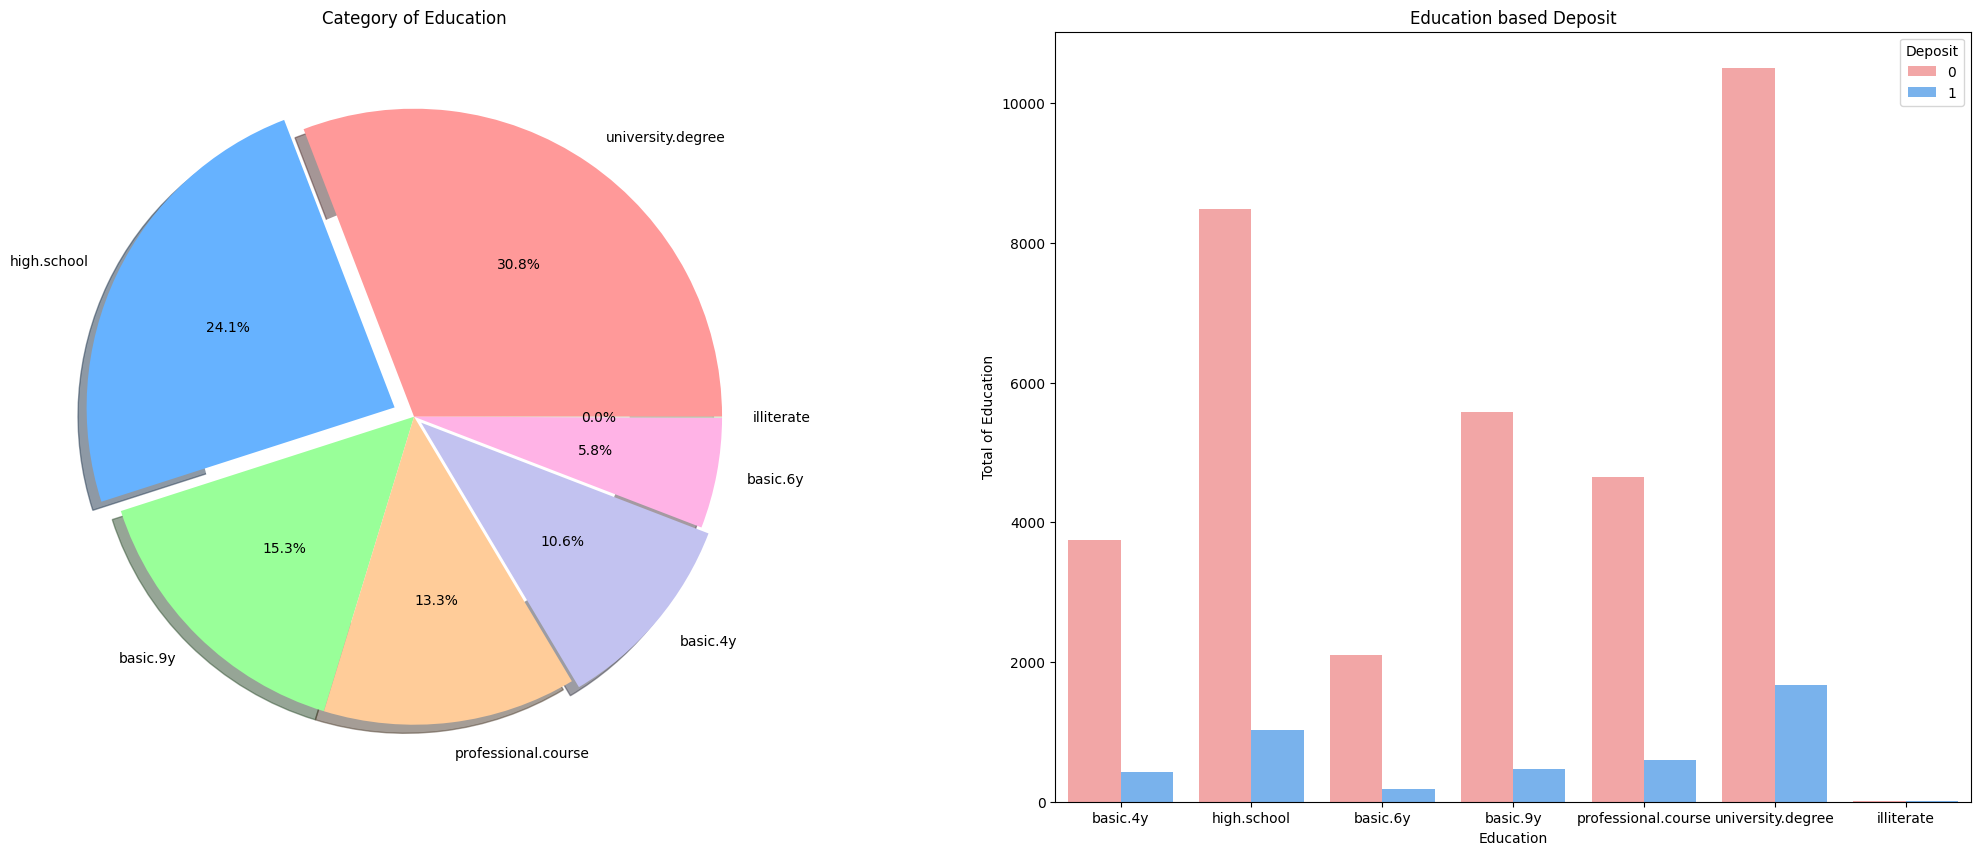

In [111]:
# presentase of education (pie)
fig, ax = plt.subplots(1, 2, figsize=(26, 10))
education_counts = bank_data['education'].value_counts()

# Menambahkan lingkaran putih di latar belakang
white_circle = plt.Circle((0, 0), 0.70, fc='white')
ax[0].add_artist(white_circle)

# Mengatur warna yang digunakan dalam pie chart
colors = ['#FF9999', '#66B2FF', '#99FF99', '#FFCC99', '#c2c2f0', '#ffb3e6', '#c2f0c2']

# Menggambar pie chart dengan warna yang telah ditentukan
ax[0].pie(education_counts, labels=education_counts.index, autopct='%1.1f%%', colors=colors, explode = [0, 0.07, 0, 0, 0.03, 0, 0], shadow=True)
ax[0].set_title('Category of Education')


# bar
sns.countplot(x='education',
              hue='y',
              data=bank_data,
              palette=colors)
ax[1].set_title('Education based Deposit')
ax[1].set_ylabel('Total of Education')
ax[1].set_xlabel('Education')
ax[1].legend(title='Deposit')

Category pendidikan yang palinga banyak pada data ini adalah university.degree

In [112]:
# inisialisasi variabel untuk menyimpan data kolom bertipe numerik
numeric_column=list(bank_data.select_dtypes(include=['int64']).columns.values) + list(bank_data.select_dtypes(include=['float64']).columns.values)
numeric_column

['age',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'y',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed']

Inisialisasi variabel  numeric_column ini akan menyimpan data kolom bertipe numerik ynag nantinya kolom tersebut akan digunakan sebagai variabel independent (X) untuk memprediksi variabel dependent (y)

In [113]:
feature_col_names = ['age',
                     'duration',
                     'campaign',
                     'pdays',
                     'previous',
                     'emp.var.rate',
                     'cons.price.idx',
                     'cons.conf.idx',
                     'euribor3m',
                     'nr.employed']
predict_class_names=['y']

X=bank_data[feature_col_names].values # variabel independent
y=bank_data[predict_class_names].values # variabel dependent
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.30) # split data menjadi data training dan data testing

Membagi dataset menjadi data training dan data testing dilakukan untuk melatih model pada data pelatihan dan menguji kinerjanya pada data pengujian untuk mengukur seberapa baik model bekerja.

# **Naive Bayes**

In [114]:
# membuat object model Naive Bayes
nb_model=GaussianNB()
nb_model.fit(X_train, y_train.ravel()) # fit data

GaussianNB()

In [115]:
nb_predict_train=nb_model.predict(X_train) # prediksi menggunakan model yang telah dilatih (nb_model) pada dataset pelatihan (X_train).
print("Accuracy : {0:.4f}".format(metrics.accuracy_score(y_train, nb_predict_train))) # akurasi model Naive Bayes pada data pelatihan.

Accuracy : 0.8677


Akurasi yang didapatkan pada data y training menggunakan Naive bayes dikatakan bagus karena mendapatkan akurasi 0.8677. Kemudian dilakukan uji akurasi pada data testing

In [116]:
nb_predict_test=nb_model.predict(X_test) # prediksi nb_model pada dataset testing (X_test).
print("nb_predict_test", nb_predict_test) # hasil prediksi
print("y_test", y_test) # nilai pada y_test

print("Accuracy : {0:.4f}".format(metrics.accuracy_score(y_test, nb_predict_test))) # hasil akurasi


nb_predict_test [0 0 0 ... 0 0 0]
y_test [[1]
 [0]
 [0]
 ...
 [0]
 [0]
 [1]]
Accuracy : 0.8732


Hasil akurasi yang didapat dari data testing juga tidak jauh berbeda dengan hasil akurasi pada data training. Tetapi dengan hasil akurasi ini belum bisa dikatakan bahwa model dapat memprediksi dengan tepat, harus dilakukan cek akurasi.

# **Cek Akurasi**

## Confusion Matrix Naive Bayes

Cek Akurasi dapat dilakukan dengan menggunakan Confusion Matrix

In [117]:
print("Confusion Matrix")
print("{0}".format(metrics.confusion_matrix(y_test, nb_predict_test))) # Confusion Matrix
print("")
print("Classification Report")
print(metrics.classification_report(y_test, nb_predict_test)) # Classification Report

Confusion Matrix
[[9964 1005]
 [ 562  826]]

Classification Report
              precision    recall  f1-score   support

           0       0.95      0.91      0.93     10969
           1       0.45      0.60      0.51      1388

    accuracy                           0.87     12357
   macro avg       0.70      0.75      0.72     12357
weighted avg       0.89      0.87      0.88     12357



Confusion Matrix :

* 9964 adalah True Negative (TN) berarti ada 9964 data telah diprediksi dengan benar sebagai kelas negatif (0) oleh model.

* 826 adalah True Positive (TP), 826 data yang seharusnya kelas positif dan telah diprediksi dengan benar sebagai kelas positif (1) oleh model.

* 1005 adalah False Positive (FP), ada 1005 data yang seharusnya kelas negatif (0), tetapi telah salah diprediksi sebagai kelas positif (1) oleh model.

562 adalah False Negative (FN), yang berarti ada 562 data yang seharusnya kelas positif (1) , tetapi telah salah diprediksi sebagai kelas negatif (0) oleh model.

Dapat dilihat pada Classification report bahwa 95% dari data yang diprediksi sebagai kelas 0 adalah benar-benar kelas 0 tetapi pada recall hanya 60% dari semua data kelas 1 berhasil diidentifikasi, nilai ini dianggap tidak memiliki  kinerja terhadap kasus positif (1). maka dari itu diperlukan peningkatan performa dengan model lain unutk mendapatkan kinerja model yang akurat dan tepat

#**Meningkatkan Peforma**

## Random Forest

In [118]:
# membuat object model random forest
rf_model = RandomForestClassifier(random_state=0, n_estimators=10)
rf_model.fit(X_train, y_train.ravel()) # fit data

RandomForestClassifier(n_estimators=10, random_state=0)

In [119]:
rf_predict_train = rf_model.predict(X_train) # prediksi  randomforest pada dataset trainig (X_train).
print("Accuracy : {0:.4f}".format(metrics.accuracy_score(y_train, rf_predict_train))) # akurasi model Random Forest pada data pelatihan.

Accuracy : 0.9931


Akurasi yang didapatkan dari model random forest pada data train ini dapat dikatangan sangat bagus karena hampir mendekati 1.

In [120]:
rf_predict_test = rf_model.predict(X_test) # prediksi rf_predict_test pada dataset testing (X_test).
print("Accuracy : {0:.4f}".format(metrics.accuracy_score(y_test, rf_predict_test))) # akurasi model Random Forest pada data pelatihan.


Accuracy : 0.9087


Begitu pula demham akurasi yang dihasilkan oleh data test, akurasi yang dihasilkan sangat baik. tetapi sebelum memutuskan bahwa model ini (Random forest) dapat dikatakan model yang tepat akurasinya perlu dilakukan uji menggunakan confusion matrix.

In [121]:
print("Confusion Matrix")
print("{0}".format(metrics.confusion_matrix(y_test, rf_predict_test))) # Confusion Matrix
print("")
print("Classification Report")
print(metrics.classification_report(y_test, rf_predict_test)) # Classification Report

Confusion Matrix
[[10561   408]
 [  720   668]]

Classification Report
              precision    recall  f1-score   support

           0       0.94      0.96      0.95     10969
           1       0.62      0.48      0.54      1388

    accuracy                           0.91     12357
   macro avg       0.78      0.72      0.75     12357
weighted avg       0.90      0.91      0.90     12357



Fokus pada nilai recall pada kelas 1. Randomforest belum optimal untuk memaksimalkan performa dari model yang dibuat karna recall dan precision masih rendah.

## Logistic Regression

Disini dilakukan peningkatan performa kembali dengan model yang lain yaitu Logistic Regression

In [122]:
lr_model = LogisticRegression(C=0.7, random_state=0, solver='liblinear', max_iter=1000) # embuat objek model
lr_model.fit(X_train, y_train.ravel()) # fit data
lr_predict_test = lr_model.predict(X_test) # prediksi dari data X_test

print('Accurancy : {0:.4f}'.format(metrics.accuracy_score(y_test, lr_predict_test))) # hasul akurasi
print(metrics.confusion_matrix(y_test, lr_predict_test)) # confusion matriks
print("")
print("Classification Report")
print(metrics.classification_report(y_test, lr_predict_test)) # clasification report

Accurancy : 0.9111
[[10704   265]
 [  834   554]]

Classification Report
              precision    recall  f1-score   support

           0       0.93      0.98      0.95     10969
           1       0.68      0.40      0.50      1388

    accuracy                           0.91     12357
   macro avg       0.80      0.69      0.73     12357
weighted avg       0.90      0.91      0.90     12357



Pada tahap optimalisasi performa dengan Logistic Regression ini, masih tetap hasil pada recall kecil, dalam kasus seperti ini mungkin saja terjadi unbalace pada data (data tidak seimbang) maka dari itu Kembali lagi ke data awal.

In [123]:
n = len(bank_data)
num_of_yes = len(bank_data.loc[bank_data['y']== 1])
num_of_no = len(bank_data.loc[bank_data['y']== 0])
print(" jumlah client yang berlanggan deposit : {0} ({1:2.2f}%)".format(num_of_yes, (num_of_yes/n)*100))
print(" jumlah client yang tidak berlanggan deposit : {0} ({1:2.2f}%)".format(num_of_no, (num_of_no/n)*100))

 jumlah client yang berlanggan deposit : 4640 (11.27%)
 jumlah client yang tidak berlanggan deposit : 36548 (88.73%)


Data yang dimiliki oleh variabel independet dan dependent memang tidak seimbang karena data yes (1) lebih kecil dari pada data no (0) sehingga terjadid ketidak seimbangan data yang mengakibatkan recall dan precision akan selalu rendah. Maka dari itu perlu dilakukan regularisasi parameter agar data seimbang.

## Regularization

1st max value of 0.849 occured at C = 0.200


Text(0, 0.5, 'recall score')

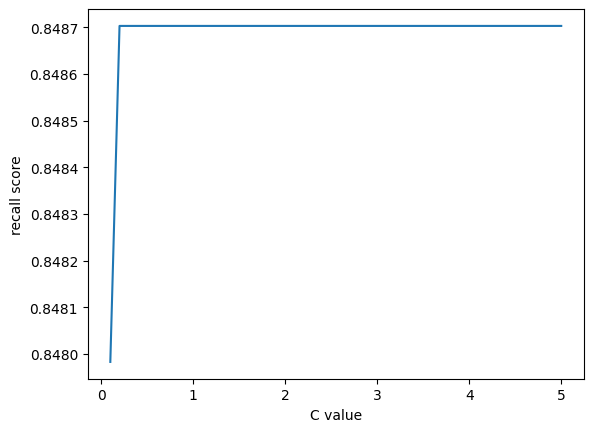

In [124]:
C_start = 0.1 # nilai awal
C_end = 5 #  nilai akhir
C_inc = 0.1 # nilai increment

C_values, recall_scores = [],[]

C_val = C_start
best_recall_score=0
while (C_val < C_end):
  C_values.append(C_val)
  lr_model_loop = LogisticRegression(C=C_val, class_weight='balanced', random_state=0, solver='liblinear', max_iter=1000) #  Membuat model regresi logistik
  lr_model_loop.fit(X_train, y_train.ravel()) # fit model
  lr_predict_loop_test = lr_model_loop.predict(X_test)
  recall_score = metrics.recall_score(y_test,lr_predict_loop_test)
  recall_scores.append(recall_score)
  if(recall_score > best_recall_score):
    best_recall_score = recall_score
    best_lr_predict_test = lr_predict_loop_test
  C_val = C_val + C_inc

best_score_C_val = C_values[recall_scores.index(best_recall_score)]
print("1st max value of {0:.3f} occured at C = {1:.3f}".format(best_recall_score, best_score_C_val))

plt.plot(C_values, recall_scores, "-")
plt.xlabel("C value")
plt.ylabel("recall score")

Setelah dilakuakn reguralisasi data, data yang sebelumnya tidak seimbang sekarang menjadi seimbang.

In [125]:
lr_model = LogisticRegression(class_weight='balanced', C = best_score_C_val, random_state=0, solver='liblinear')
lr_model.fit(X_train, y_train.ravel())
lr_predict_test=lr_model.predict(X_test)

print('Accurancy : {0:.4f}'.format(metrics.accuracy_score(y_test, lr_predict_test)))
print(metrics.confusion_matrix(y_test, lr_predict_test))
print("")
print("Classification Report")
print(metrics.classification_report(y_test, lr_predict_test))
print(metrics.recall_score(y_test, lr_predict_test))

Accurancy : 0.8529
[[9361 1608]
 [ 210 1178]]

Classification Report
              precision    recall  f1-score   support

           0       0.98      0.85      0.91     10969
           1       0.42      0.85      0.56      1388

    accuracy                           0.85     12357
   macro avg       0.70      0.85      0.74     12357
weighted avg       0.92      0.85      0.87     12357

0.8487031700288185


Dengan menggunakan logistic regression dengan data yang balance ke dalam x train dan y train untuk meprediksi X_test untuk Logistic Regression modelnya. sekarang kita mempunyai recall yang balance. Sehingga dapat dikatakan model logistic Regression ini memiliki kinerja yang baik dan akurat

# Cross Validation

Regularisasi juga dapat dilakukan dengan Cross Validation

In [126]:
lr_cv_model = LogisticRegressionCV(n_jobs=-1, random_state=0, Cs=3, cv=10, refit=False, class_weight="balanced", max_iter=500) # melatih model regresi logistik dengan cross-validation menggunakan LogisticRegressionCV
lr_cv_model.fit(X_train, y_train.ravel()) # fit data

LogisticRegressionCV(Cs=3, class_weight='balanced', cv=10, max_iter=500,
                     n_jobs=-1, random_state=0, refit=False)

In [127]:
lr_cv_predict_test = lr_cv_model.predict(X_test)

print("Accurancy : {0:.4f}".format(metrics.accuracy_score(y_test, lr_cv_predict_test)))
print(metrics.confusion_matrix(y_test, lr_cv_predict_test))
print("")
print("Classification Report")
print(metrics.classification_report(y_test, lr_cv_predict_test))

Accurancy : 0.8598
[[9459 1510]
 [ 223 1165]]

Classification Report
              precision    recall  f1-score   support

           0       0.98      0.86      0.92     10969
           1       0.44      0.84      0.57      1388

    accuracy                           0.86     12357
   macro avg       0.71      0.85      0.74     12357
weighted avg       0.92      0.86      0.88     12357



Hasil yang didapatkan pada recall juga seimbang karena data yang digunakan adalah data yang sudah balance

# K-Nearest Neighbors (KNN)

In [128]:
# load dataset ke 2
bank_second_data = pd.read_csv('./bank-additional.csv', delimiter=';')

In [129]:
# memeriksa shape dataset
bank_second_data.shape

(4119, 21)

In [130]:
feature_col_names = ['age',
                     'duration',
                     'campaign',
                     'pdays',
                     'previous',
                     'emp.var.rate',
                     'cons.price.idx',
                     'cons.conf.idx',
                     'euribor3m',
                     'nr.employed']
predict_class_names=['y']

X2=bank_second_data[feature_col_names].values # menentukan variabel independet
y2=bank_second_data[predict_class_names].values # menentukan data dependent
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, random_state=1, test_size=0.30) # split data menjadi training dan testing data


In [131]:
# menentukan k value
import math
math.sqrt(len(y_test2))

35.156791662493895

In [132]:
# membuat objek model knn
knn_model=KNeighborsClassifier(n_neighbors=35, p=2, metric='euclidean')
knn_model.fit(X_train2, y_train2) # fit model


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(metric='euclidean', n_neighbors=35)

In [133]:
knn_predict_train=knn_model.predict(X_train2)
print("Accuracy : {0:.4f}".format(metrics.accuracy_score(y_train2, knn_predict_train))) # nilai akurasi

Accuracy : 0.9109


Nilai akurasi dari data X_train2 yang didapat adalah 0.9 yang dimana nilai ini sangat baik

In [134]:
knn_predict_test=knn_model.predict(X_test2)
print("knn_predict_test", knn_predict_test)
print("y_test", y_test2)

print("Accuracy : {0:.4f}".format(metrics.accuracy_score(y_test2, knn_predict_test)))


knn_predict_test ['no' 'no' 'yes' ... 'no' 'no' 'no']
y_test [['no']
 ['no']
 ['yes']
 ...
 ['no']
 ['no']
 ['no']]
Accuracy : 0.9110


In [135]:
print("Confusion Matrix")
print("{0}".format(metrics.confusion_matrix(y_test2, knn_predict_test)))
print("")
print("Classification Report")
print(metrics.classification_report(y_test2, knn_predict_test))

Confusion Matrix
[[1066   45]
 [  65   60]]

Classification Report
              precision    recall  f1-score   support

          no       0.94      0.96      0.95      1111
         yes       0.57      0.48      0.52       125

    accuracy                           0.91      1236
   macro avg       0.76      0.72      0.74      1236
weighted avg       0.90      0.91      0.91      1236



Fokus pada nilai recall kelas 1, Sama seperti sebelumnya bahwa nilai recall ini rendah, maka dari itu perlu dilakukan meningkatkan peforma

# Support Vector Machines (SVM)

Meningkatkan peforma jika menggunakan model SVM

In [136]:
X_sc=StandardScaler() # membuat objek StandardScaler unutk penskalaan data
X_train_svm = X_sc.fit_transform(X_train2) # fit data
X_test_svm = X_sc.transform(X_test2) # pengujian pada X_test2

### SVM kernel rbf

In [137]:
classifier = SVC(kernel='rbf', gamma=15, C=7, random_state=1) # Membuat model SVM dengan kernel RBF (Radial Basis Function)
classifier.fit(X_train2, y_train2) # fit data

# prediksi test data
y_pred =classifier.predict(X_test2)
print("Accuracy when the kernel is rbf : {0:.4f}".format(metrics.accuracy_score(y_test2, y_pred))) # akurasi


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy when the kernel is rbf : 0.8989


### SVM kernel Poly

In [139]:
classifier = SVC(kernel='poly', degree=4)  # Membuat model SVM dengan kernel polynomial (poly)
classifier.fit(X_train2, y_train2) # fit data

# prediksi test data
y_pred =classifier.predict(X_test2)
print("Accuracy when the kernel is rbf : {0:.4f}".format(metrics.accuracy_score(y_test2, y_pred)))


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy when the kernel is rbf : 0.9045


### SVM kernel linear

In [140]:
classifier = SVC(kernel='linear', random_state=1) # Membuat model SVM dengan kernel linear dan mengatur nilai random_state
classifier.fit(X_train2, y_train2)

# prediksi test data
y_pred =classifier.predict(X_test2)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [141]:
y_pred


array(['no', 'no', 'yes', ..., 'no', 'no', 'no'], dtype=object)

In [142]:
print("Accuracy when the kernel is linear : {0:.4f}".format(metrics.accuracy_score(y_test2, y_pred))) # akurasi


Accuracy when the kernel is linear : 0.9215


Akurasi yang didapatkan model ketika menggunakan kernel linear lebih baik dari pada kernel rbf dan poly

# Decision Tree

In [143]:
# Membuat model Decision Tree dengan kriteria entropy
clf_entropy = DecisionTreeClassifier(criterion="entropy", random_state=1, max_depth=3, min_samples_leaf=5)
clf_entropy.fit(X_train2, y_train2)

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=5,
                       random_state=1)

In [144]:
y_pred_en = clf_entropy.predict(X_test2) # y predict
y_pred_en

array(['no', 'no', 'yes', ..., 'no', 'no', 'no'], dtype=object)

In [145]:
print("Accuracy : {0:.4f}".format(metrics.accuracy_score(y_test2, y_pred_en))) # akurasi dari model DecisionTreeClassifier

Accuracy : 0.9102


Akurasi pada model SVM kernel lebih baik daripada Decision Tree